In [1]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [9]:
# Define paths and parameters
data_dir = r"D:\PFE\Datasets\ForClassification\wheat_leaf"  # Replace with your dataset path
img_height, img_width = 150, 150  # Image dimensions
batch_size = 32
epochs = 30

In [3]:

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split 20% of data for validation
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Randomly zoom images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels
)

In [4]:
# Create training and validation generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 327 images belonging to 3 classes.
Found 80 images belonging to 3 classes.


In [5]:
# Check class indices
print("Class Indices:", train_generator.class_indices)

Class Indices: {'Healthy': 0, 'septoria': 1, 'stripe_rust': 2}


In [6]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(3, activation='softmax')  # 3 output classes (Healthy, Septoria, Brown Rust)
])

C:\Users\DELL\Desktop\PFETesting\paper1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

C:\Users\DELL\Desktop\PFETesting\paper1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 8s/step - accuracy: 0.4626 - loss: 1.2269 - val_accuracy: 0.5781 - val_loss: 1.0396
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 4s 534ms/step - accuracy: 0.5000 - loss: 1.0452

C:\Users\DELL\Desktop\PFETesting\paper1\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5000 - loss: 1.0452 - val_accuracy: 0.4844 - val_loss: 1.0195
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 62s 6s/step - accuracy: 0.5365 - loss: 1.0084 - val_accuracy: 0.4844 - val_loss: 1.0342
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5938 - loss: 0.8839 - val_accuracy: 0.5312 - val_loss: 1.0380
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - accuracy: 0.5511 - loss: 0.8809 - val_accuracy: 0.5156 - val_loss: 0.9675
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6562 - loss: 0.8041 - val_accuracy: 0.4688 - val_loss: 0.9845
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.6227 - loss: 0.8349 - val_accuracy: 0.6406 - val_loss: 0.9785
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 928ms/step - accuracy: 0.6250 - loss: 0.8317 - val_accuracy: 0.5312 - val_loss: 0.9219
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.6546 - loss: 0.7685 - val_accuracy: 0.6094 - val_loss: 0.9128
E

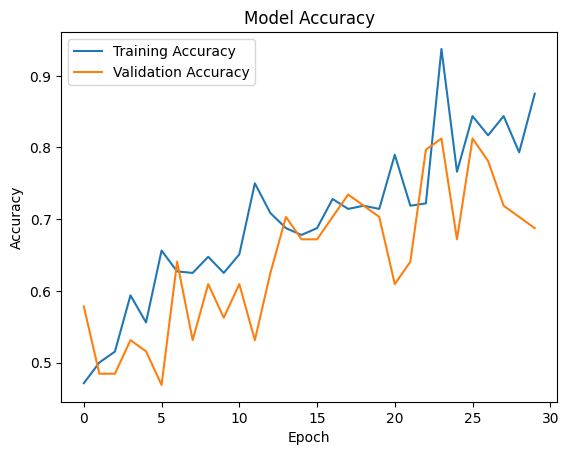

In [11]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

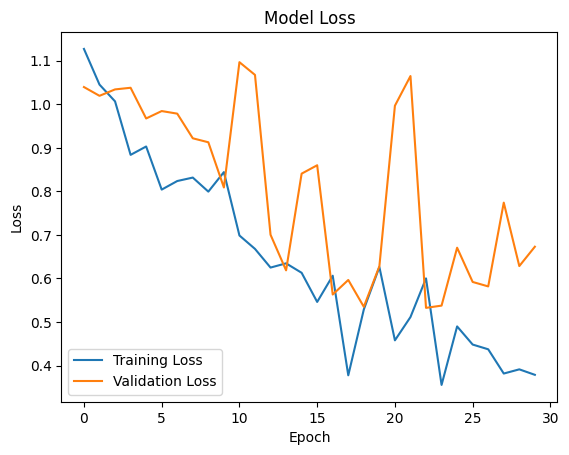

In [12]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [13]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')

# Generate predictions
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Classification report
class_names = list(validation_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Save the model
model.save('wheat_disease_classifier.h5')
print("Model saved as 'wheat_disease_classifier.h5'")

# Load the model for prediction
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

def predict_disease(img_path):
    # Load the trained model
    model = load_model('wheat_disease_classifier.h5')
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values
    
    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    class_labels = list(validation_generator.class_indices.keys())
    return class_labels[predicted_class[0]]



3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7391 - loss: 0.5963
Validation Loss: 0.5587587356567383
Validation Accuracy: 0.7749999761581421
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step


Classification Report:
              precision    recall  f1-score   support

     Healthy       0.12      0.10      0.11        20
    septoria       0.25      0.16      0.19        19
 stripe_rust       0.52      0.66      0.58        41

    accuracy                           0.40        80
   macro avg       0.30      0.31      0.30        80
weighted avg       0.36      0.40      0.37        80

Confusion Matrix:
[[ 2  2 16]
 [ 7  3  9]
 [ 7  7 27]]
Model saved as 'wheat_disease_classifier.h5'
